# 1. Lectura del conjunto de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [3]:
df.shape

(366, 2)

In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.sort_index(inplace=True)
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


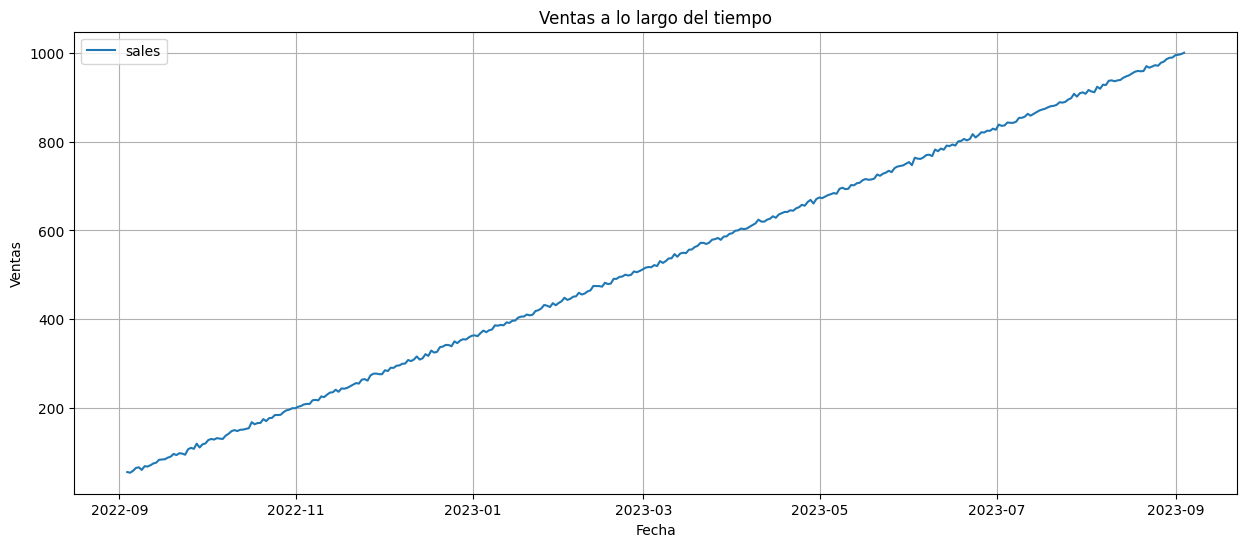

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(df['sales'], label="sales")
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

## 2. EDA y Pre-procesamiento de datos

In [6]:
df.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


In [8]:
#Cantidad de NaN
cantidad_nan = df.isna().sum()
print("Cantidad de NaN:")
print(cantidad_nan)

Cantidad de NaN:
sales    0
dtype: int64


In [9]:
# Verificamos que la serie temporal no tiene saltos
df_dias = df.index.to_series().diff().dt.days
print("Diferencia de días entre mediciones:")
print(df_dias.value_counts().sort_index())

Diferencia de días entre mediciones:
date
1.0    365
Name: count, dtype: int64


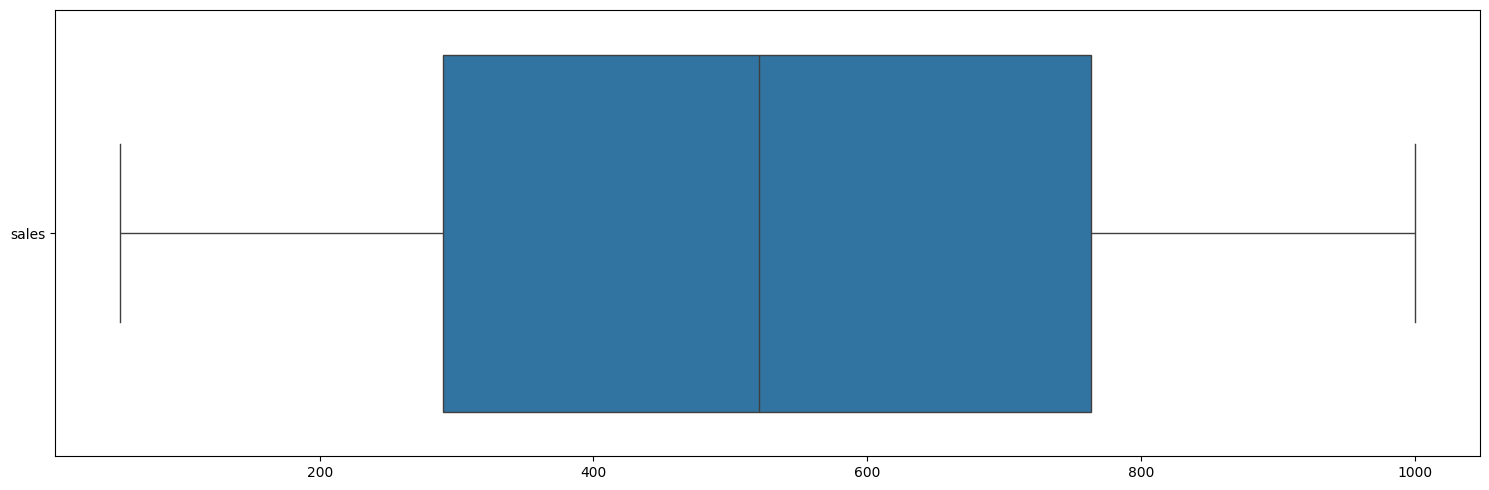

In [10]:
#Analisis de OUTLIERS
fig, axis = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, orient='h')
plt.tight_layout()
plt.show()

El dataset ya esta procesado

# Análisis de la Serie Temporal

### Descomposisición de la serie

In [11]:
decomposition = seasonal_decompose(df, model='additive', period=30)
decomposition

### Analisis de la tendencia

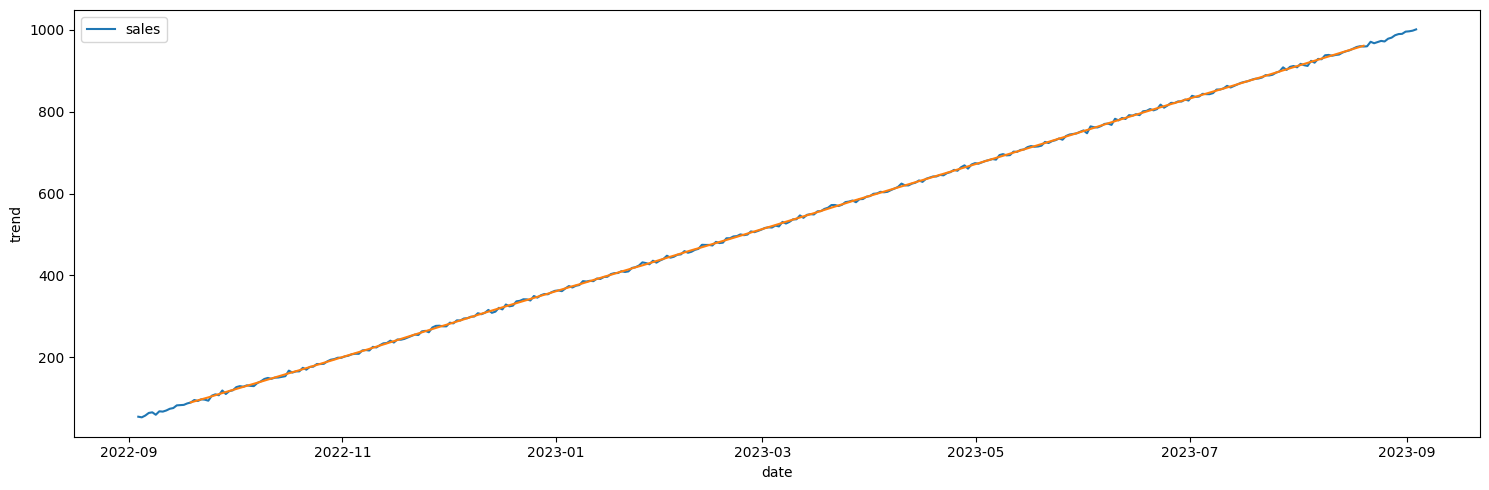

In [12]:
trend = decomposition.trend
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()
plt.show()

### Análisis de la estacionalidad

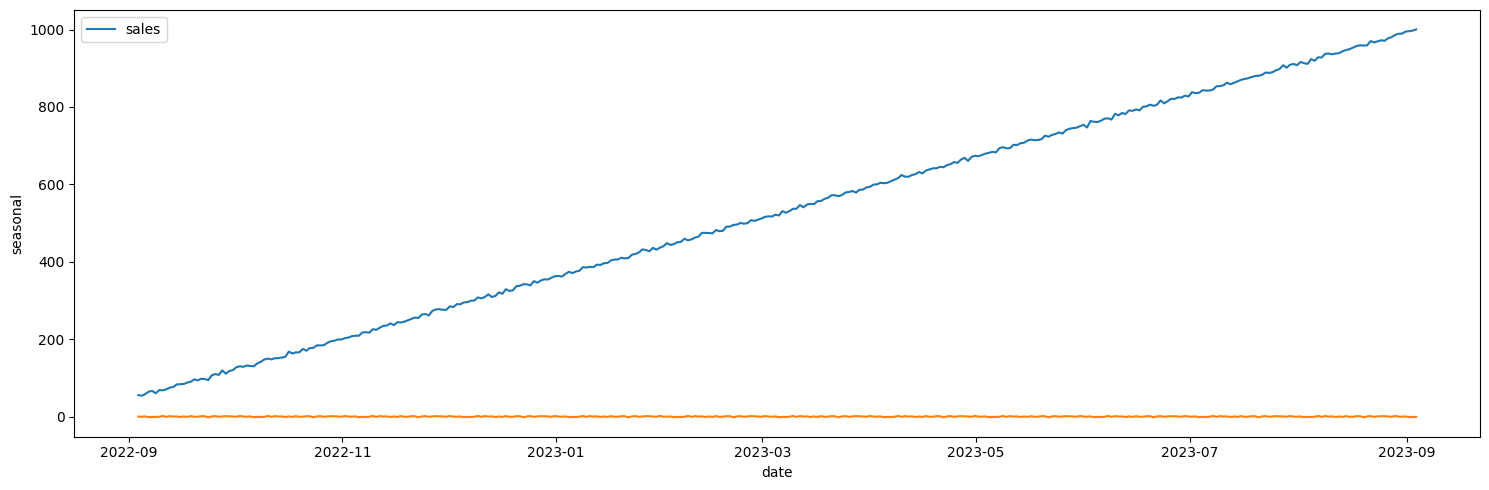

In [13]:
seasonal = decomposition.seasonal
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(data = df)
sns.lineplot(data = seasonal)

plt.tight_layout()
plt.show()

In [14]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Ell p-value es mayor a 0.05 por lo tanto la serie es no estacionaria

### Analisis de la variabilidad

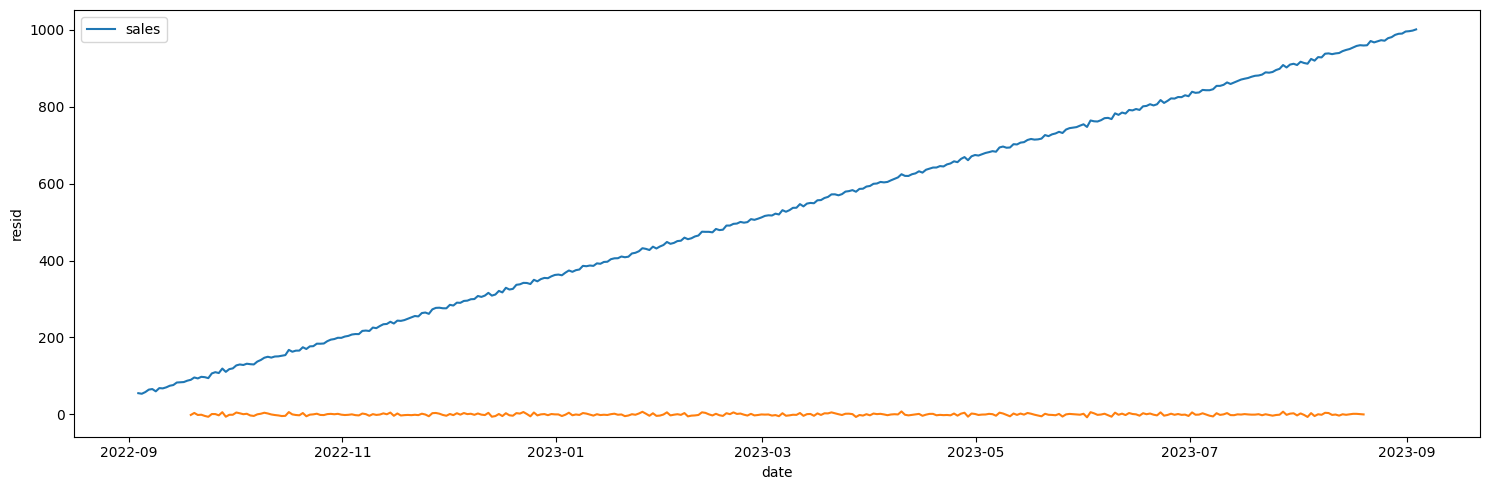

In [15]:
residual = decomposition.resid
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(data = df)
sns.lineplot(data = residual)

plt.tight_layout()
plt.show()

### Análisis de autocorrelacion

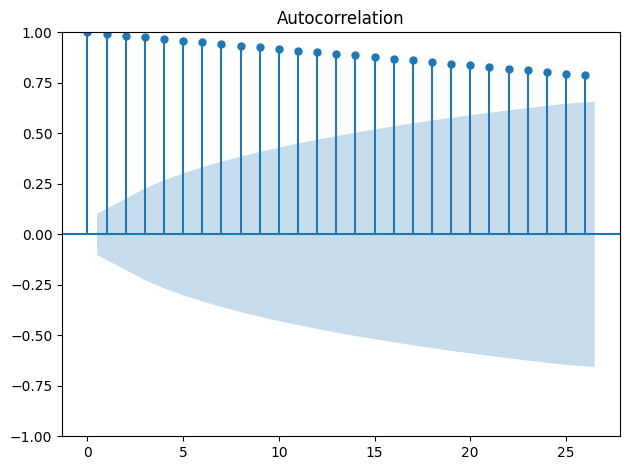

In [16]:
plot_acf(df)

plt.tight_layout()
plt.show()

# Entrenamiento del modelo

### Primero la hacemos estacionaria aplicando diferenciacion

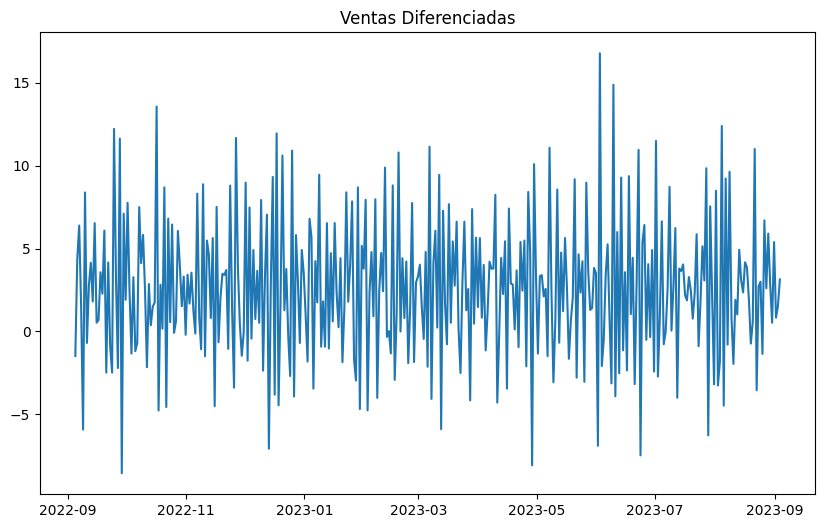

In [17]:
df['diff_sales'] = df['sales'].diff()
df.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['diff_sales'])
plt.title('Ventas Diferenciadas')
plt.show()

In [18]:
test_stationarity(df["diff_sales"].dropna())

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [19]:
model = auto_arima(df["sales"], seasonal = False, trace = True)
model.summary()

/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1837.302, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2090.887, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1965.816, Time=0.04 sec


/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2204.518, Time=0.01 sec


/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec


/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1835.533, Time=0.39 sec


/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1833.579, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1833.638, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1918.217, Time=0.08 sec


/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.159 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -912.790
Date:                Sat, 14 Jun 2025   AIC                           1833.579
Time:                        02:18:43   BIC                           1849.168
Sample:                    09-04-2022   HQIC                          1839.775
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7962      0.133     21.069      0.000       2.536       3.056
ar.L1         -0.0760      0.051     -1.484      0.138      -0.176       0.024
ma.L1         -0.9481      0.019    -50.804      0.000      -0.985      -0.912
sigma2         8.7599      0.689     12.707      0.000       7.409      10.111
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.96   Prob(JB):                         0.66
Heteroskedasticity (H):               0.91   Skew:                             0.06
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

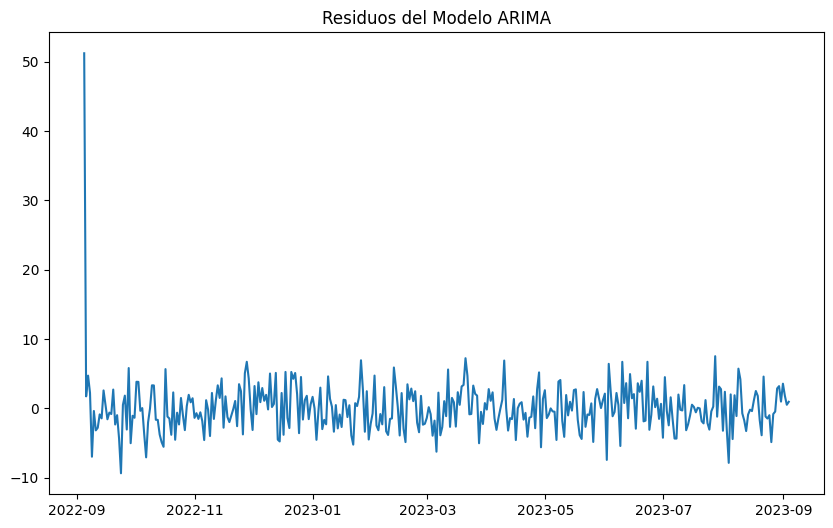

In [20]:
residuals = model.resid()

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuos del Modelo ARIMA')
plt.show()

no se ven patrones en los residuos

# Predicción del conjunto de prueba

In [21]:
df.drop(columns=['diff_sales'], inplace=True)
df.head()

,sales
date,
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
2022-09-08 17:10:08.079328,60.081865


In [22]:
train, test = train_test_split(df['sales'], test_size=0.2, shuffle=False)
model.fit(train)
forecast = model.predict(n_periods=len(test))

rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 2.8835666828999322
MAE: 2.3560715282655553


/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Salvador0302-Time-Series-Project-Alternativo/myenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


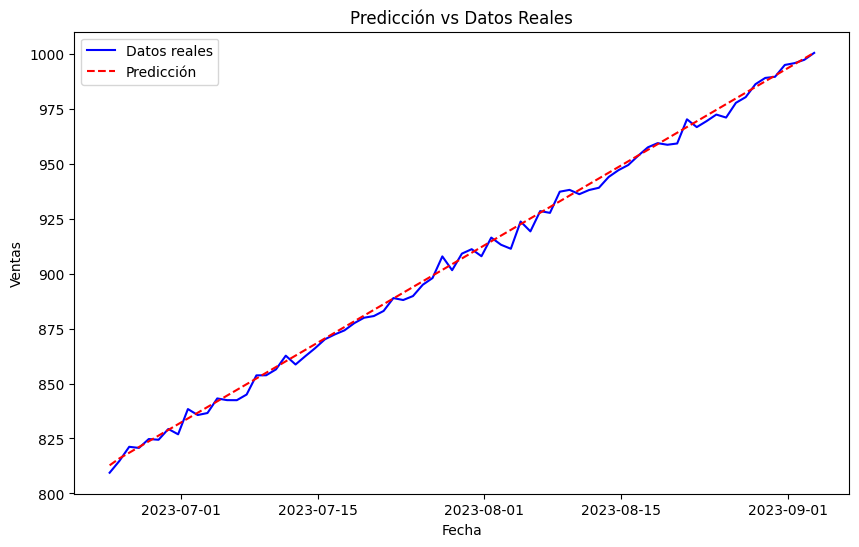

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Datos reales', color='blue')
plt.plot(test.index, forecast, label='Predicción', color='red', linestyle='--')
plt.title('Predicción vs Datos Reales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [24]:
from pickle import dump
with open('../models/model_1_1_1.pkl', 'wb') as file:
    dump(model, file)